<a href="https://colab.research.google.com/github/harshitha3506/machine-learning/blob/main/mlassignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Dataset Analysis

160123737157 HARSHITHA PALADUGU IT3

**Dataset Used:**

The **California Housing dataset** from the scikit-learn library is utilized in this assignment. This dataset is a rich source of information regarding housing features, including:

*   **Median Income:** Median income of the households in a block.
*   **House Age:** Median age of the houses in a block.
*   **Average Rooms:** Average number of rooms per household.
*   **Average Bedrooms:** Average number of bedrooms per household.
*   **Population:** Block population.
*   **Average Occupancy:** Average number of household members.
*   **Latitude:** Block latitude.
*   **Longitude:** Block longitude.

The **target variable** for this dataset is the **median house value** in each block.

**Tasks Performed:**

This assignment demonstrates various machine learning techniques on the California Housing dataset:

1.  **Data Loading and Preparation:** The dataset was loaded directly into the Colab environment, and the feature matrix (X) and target vector (y) were prepared for modeling.
2.  **Data Exploration:** Sample rows were displayed to understand the structure and initial characteristics of the dataset.
3.  **Regression and Classification:** The dataset was used to perform both regression (predicting continuous house values) and classification (categorizing house values) tasks. This involved:
    *   Preprocessing steps tailored for each task.
    *   Training appropriate models (Linear Regression and Logistic Regression).
    *   Evaluating the performance of the models using relevant metrics.

***(a) Load the data into memory***

We load the California Housing dataset from scikit-learn and prepare the feature matrix X and target vector y

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
data = fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Features:")
print(X.head())

print("\nTarget:")
print(y[:5])


Features:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target:
[4.526 3.585 3.521 3.413 3.422]


### (b) Split the data into training and testing sets

To evaluate the performance of our models, we split the dataset into training and testing sets. A common split ratio is used: **80% of the data for training and validation**, and the remaining **20% for testing**.

The `train_test_split` function from `sklearn.model_selection` is used for this purpose. We set a `random_state` to ensure the split is reproducible. The features and target are split into `Xtrain`, `Xtest`, `ytrain`, and `ytest`.

In [3]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(Xtrain))
print("Testing samples:", len(Xtest))


Training samples: 16512
Testing samples: 4128


### (c) Objective of logistic regression with L2 regularization

This section describes the objective function that logistic regression aims to minimize when L2 regularization is applied.

**Logistic Regression** is a statistical model used for binary classification. It models the probability of a sample belonging to a particular class.

**L2 Regularization** (also known as Ridge Regularization) is a technique used to prevent overfitting in linear models. It adds a penalty term to the objective function that is proportional to the square of the magnitude of the model's weights. This encourages the model to use smaller weights, which can lead to a simpler model that generalizes better to unseen data.

The objective function for logistic regression with L2 regularization is to minimize the sum of the **cross-entropy loss** and the **L2 regularization term**.

The cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1. The L2 regularization term penalizes large weights.

The objective function to be minimized is:

$$
\min_{\mathbf{w}} \left( \frac{1}{N} \sum_{i=1}^N \text{log-loss}(y_i, \hat{y}_i) + \frac{\lambda}{2} \|\mathbf{w}\|^2_2 \right)
$$

Where:
- $N$ is the number of training examples.
- $y_i$ is the true label for the $i$-th example (0 or 1).
- $\hat{y}_i$ is the predicted probability of the $i$-th example belonging to class 1.
- $\mathbf{w}$ is the vector of model weights.
- $\lambda$ is the regularization parameter, controlling the strength of the L2 penalty. A higher $\lambda$ imposes a stronger penalty on large weights.
- $\|\mathbf{w}\|^2_2$ is the squared L2 norm of the weight vector, calculated as $\sum_{j=1}^D w_j^2$, where D is the number of features.

Minimizing this objective function finds the set of weights $\mathbf{w}$ that best fit the training data while keeping the weight magnitudes small, thus reducing the risk of overfitting.

### (d) Run logistic regression with varying regularization parameter $\lambda$

In this section, we train logistic regression models with different values of the regularization parameter $\lambda$. By varying $\lambda$, we can observe its effect on the model's performance and the magnitude of the learned weights.

We will plot the following metrics against $\lambda$:

*   **Cross-entropy error (Log Loss):** Measures the performance of the classification model. Lower values indicate better performance. We will plot this for both the training and test sets to observe overfitting.
*   **L2 norm of weights:** Represents the magnitude of the weight vector. As $\lambda$ increases, we expect the weight norm to decrease due to the regularization penalty.
*   **Individual weight values:** Shows how the values of individual feature weights change with varying $\lambda$. This helps understand which features are more influenced by regularization.
*   **Accuracy:** The proportion of correctly classified samples. We will plot this for both training and test sets.

The regularization parameter in scikit-learn's `LogisticRegression` is controlled by the parameter `C`, which is the inverse of $\lambda$ ($C = 1/\lambda$). Therefore, to use the specified $\lambda$ values, we will set `C` accordingly. We add a small value (1e-5) to $\lambda$ in the denominator to avoid division by zero when $\lambda=0$.

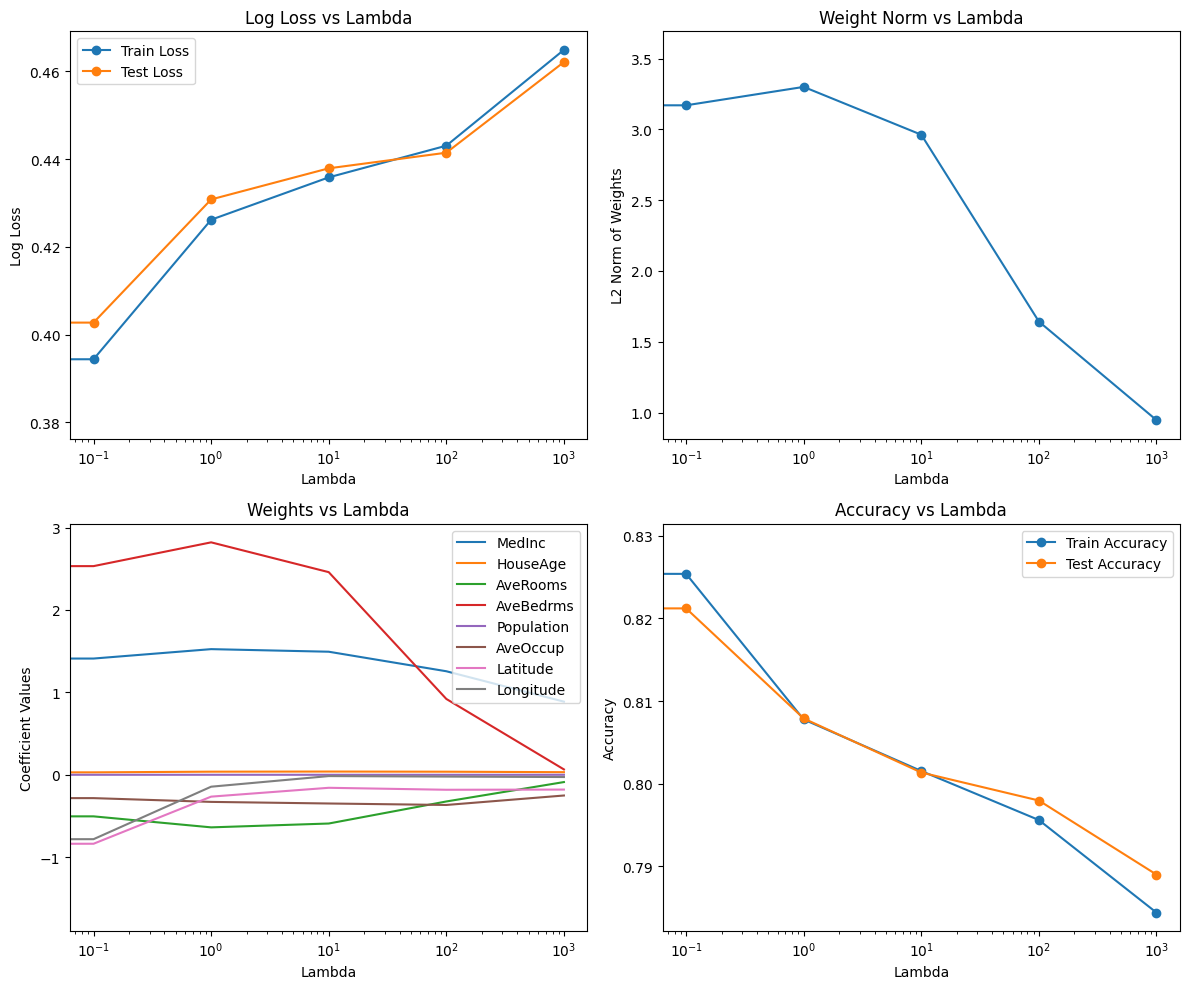

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Convert regression target into binary classification
threshold = np.median(ytrain)
ytrain_class = (ytrain > threshold).astype(int)
ytest_class = (ytest > threshold).astype(int)

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses = []
test_losses = []
weight_norms = []
train_acc = []
test_acc = []
coefs = []

for l in lambdas:
    model = LogisticRegression(penalty='l2', C=1/(l+1e-5), solver='liblinear', max_iter=1000)
    model.fit(Xtrain, ytrain_class)

    # Predictions
    ytrain_pred = model.predict_proba(Xtrain)[:,1]
    ytest_pred = model.predict_proba(Xtest)[:,1]

    # Calculate log-loss
    train_loss = log_loss(ytrain_class, ytrain_pred)
    test_loss = log_loss(ytest_class, ytest_pred)

    # Calculate accuracy
    train_accuracy = accuracy_score(ytrain_class, model.predict(Xtrain))
    test_accuracy = accuracy_score(ytest_class, model.predict(Xtest))

    # Weight norms and coefficients
    weight_norm = np.linalg.norm(model.coef_)
    coef = model.coef_.flatten()

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    weight_norms.append(weight_norm)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    coefs.append(coef)

# Plotting Log-loss
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Lambda")
plt.legend()

# Plotting Weight Norm
plt.subplot(2, 2, 2)
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs Lambda")

# Plotting Coefficients
plt.subplot(2, 2, 3)
coefs = np.array(coefs)
for i in range(coefs.shape[1]):
    plt.plot(lambdas, coefs[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Coefficient Values")
plt.title("Weights vs Lambda")
plt.legend()

# Plotting Accuracy
plt.subplot(2, 2, 4)
plt.plot(lambdas, train_acc, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_acc, marker='o', label="Test Accuracy")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
plt.legend()

plt.tight_layout()
plt.show()


### (e) Transform features using Gaussian basis functions

In this section, we transform the original features using Gaussian basis functions. This technique allows us to introduce non-linearity into the model, potentially capturing more complex relationships in the data than a simple linear model.

Each feature is expanded using **5 univariate Gaussian basis functions**. These functions are centered at **means evenly spaced between -10 and 10**. We will explore the effect of different values of the **variance ($\sigma$)** of these Gaussian functions on the model's performance.

The formula for a univariate Gaussian basis function centered at $\mu$ with variance $\sigma^2$ is:

$$
\phi(x) = \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

For each original feature, we create 5 new features by applying this function with the different mean values. This significantly increases the number of features in our dataset.

In [5]:
def gaussian_basis(X, means, sigma):
    new_features = []
    for col in X.columns:
        for m in means:
            feature = np.exp(-(X[col] - m) ** 2 / (2 * sigma**2))
            new_features.append(feature)
    return np.column_stack(new_features)

# Define means and sigma values
means = np.linspace(-10, 10, 5)
sigma_values = [0.1, 0.5, 1, 5, 10]


### (f) Regression without regularization and effect of $\sigma$

Here, we perform linear regression using only the transformed features generated by the Gaussian basis functions. Importantly, we perform this regression **without any regularization** (equivalent to setting the regularization parameter $\lambda=0$).

We will train separate models for different values of the variance $\sigma$ used in the Gaussian basis functions. By observing the training and testing errors for each $\sigma$, we can understand how the width of the Gaussian functions influences the model's ability to fit the data and generalize to unseen data.

We will plot the **Mean Squared Error (MSE)** for both the training and testing sets against the different $\sigma$ values.

**Effect of $\sigma$ on Overfitting and the Bias-Variance Trade-off:**

*   **Small $\sigma$:** When $\sigma$ is small, the Gaussian basis functions are narrow and highly localized. This allows the model to fit the training data very closely, potentially capturing noise and leading to **overfitting**. In this case, the model will have **low bias** (as it can fit the training data well) but **high variance** (as it is sensitive to small changes in the training data and may not generalize well).
*   **Large $\sigma$:** When $\sigma$ is large, the Gaussian basis functions are wide and smooth. This results in a simpler model that is less likely to overfit but might not be able to capture complex patterns in the data. In this case, the model will have **high bias** (as it might not fit the training data perfectly) but **low variance** (as it is less sensitive to noise and generalizes better).

By analyzing the plots, we can identify the value of $\sigma$ that provides a good balance between bias and variance, resulting in the best performance on the test set.

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.65821e-283): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.98329e-81): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


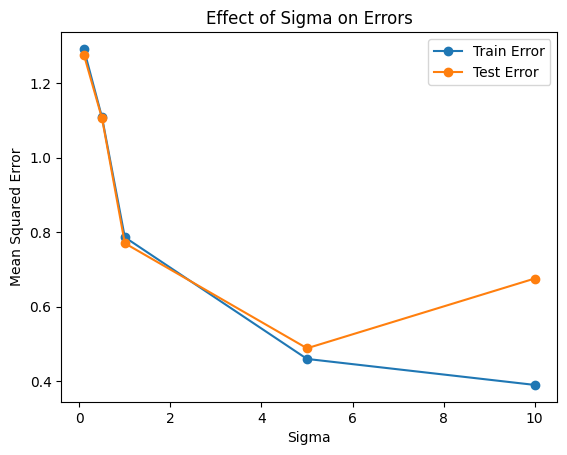

In [6]:
from sklearn.linear_model import Ridge

train_errors_sigma = []
test_errors_sigma = []

for sigma in sigma_values:
    Xtrain_transformed = gaussian_basis(Xtrain, means, sigma)
    Xtest_transformed = gaussian_basis(Xtest, means, sigma)

    model = Ridge(alpha=0)  # No regularization
    model.fit(Xtrain_transformed, ytrain)

    ytrain_pred = model.predict(Xtrain_transformed)
    ytest_pred = model.predict(Xtest_transformed)

    train_error = np.mean((ytrain - ytrain_pred) ** 2)
    test_error = np.mean((ytest - ytest_pred) ** 2)

    train_errors_sigma.append(train_error)
    test_errors_sigma.append(test_error)

# Plotting errors vs sigma
plt.plot(sigma_values, train_errors_sigma, marker='o', label="Train Error")
plt.plot(sigma_values, test_errors_sigma, marker='o', label="Test Error")
plt.xlabel("Sigma")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Sigma on Errors")
plt.legend()
plt.show()


### (g) Regularized regression with all basis functions

In this section, we use all the Gaussian basis functions (with a chosen value of $\sigma$) and apply **L2 regularization (Ridge Regression)** with various values of the regularization parameter $\lambda$.

The objective here is to see how L2 regularization affects the model's complexity and performance when using a large number of transformed features. L2 regularization penalizes large weights, effectively shrinking them towards zero. This helps to prevent overfitting by reducing the influence of less important features.

We will plot the following metrics against $\lambda$:

*   **Mean Squared Error (MSE):** For both training and testing sets, to observe how regularization affects the trade-off between fitting the training data and generalizing to the test data.
*   **L2 Norm of Weights:** The overall magnitude of the weight vector. We expect the weight norm to decrease as $\lambda$ increases.
*   **L2 Norm of Weights per Basis Function Set:** To gain a deeper understanding of how regularization affects the weights associated with the Gaussian basis functions derived from each original feature.

By analyzing these plots, we can see how increasing the regularization strength ($\lambda$) reduces the complexity of the model (by shrinking weights) and its impact on the training and testing errors. We aim to find a $\lambda$ that minimizes the test error, indicating a good balance between bias and variance.

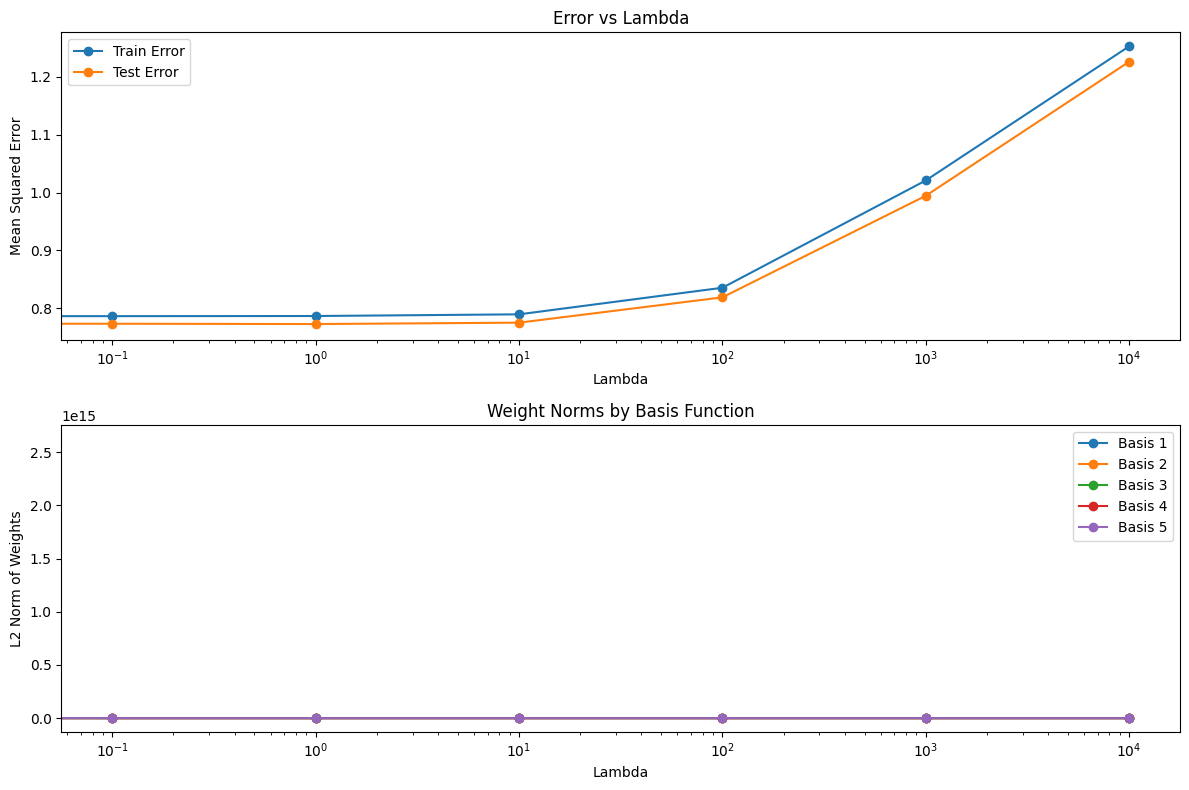

In [7]:
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
sigma = 1  # Choose one value of sigma
Xtrain_transformed = gaussian_basis(Xtrain, means, sigma)
Xtest_transformed = gaussian_basis(Xtest, means, sigma)

train_errors = []
test_errors = []
weight_norms = []
sigma_norms = []

for l in lambdas:
    model = Ridge(alpha=l)
    model.fit(Xtrain_transformed, ytrain)

    ytrain_pred = model.predict(Xtrain_transformed)
    ytest_pred = model.predict(Xtest_transformed)

    train_error = np.mean((ytrain - ytrain_pred) ** 2)
    test_error = np.mean((ytest - ytest_pred) ** 2)
    weight_norm = np.linalg.norm(model.coef_)

    # Norms for each basis function set
    sigma_norm = []
    n_features = len(means)
    for i in range(X.shape[1]):
        start = i * n_features
        end = start + n_features
        norm = np.linalg.norm(model.coef_[start:end])
        sigma_norm.append(norm)

    train_errors.append(train_error)
    test_errors.append(test_error)
    weight_norms.append(weight_norm)
    sigma_norms.append(sigma_norm)

# Plotting error vs lambda
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(lambdas, train_errors, marker='o', label="Train Error")
plt.plot(lambdas, test_errors, marker='o', label="Test Error")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Error vs Lambda")

# Plotting weight norms per basis function
plt.subplot(2, 1, 2)
sigma_norms = np.array(sigma_norms)
for i in range(len(means)):
    plt.plot(lambdas, sigma_norms[:, i], marker='o', label=f"Basis {i+1}")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Weights")
plt.legend()
plt.title("Weight Norms by Basis Function")

plt.tight_layout()
plt.show()


### (h) Designing Gaussian functions to capture input relationships

We explain how multivariate Gaussian basis functions could be used to model interactions between features, and discuss the trade-off between bias and variance in such designs.

Multivariate Gaussian basis functions can be designed to capture complex relationships and interactions between multiple input features simultaneously. Unlike univariate basis functions that operate on each feature independently, multivariate functions consider the joint distribution of features. This allows the model to learn more intricate patterns in the data.

However, using multivariate basis functions significantly increases the complexity of the model. With a higher number of parameters to learn, there's a greater risk of **overfitting** to the training data, especially with limited data. This relates to the **bias-variance trade-off**:

*   **Increased Complexity:** Using multivariate basis functions can potentially reduce **bias** by allowing the model to fit more complex relationships.
*   **Increased Risk of Overfitting:** The increased complexity can lead to higher **variance**, making the model more sensitive to the specific training data and less able to generalize to unseen data.

Therefore, when using multivariate Gaussian basis functions, it is crucial to employ appropriate **regularization techniques** (like L1 or L2 regularization) to control the model's complexity and mitigate the risk of overfitting, finding a balance that optimizes performance on unseen data.

We explain how multivariate Gaussian basis functions can be designed to model feature interactions and discuss its effect on bias-variance trade-off.

Multivariate Gaussian functions combine multiple features, allowing the model to capture complex interactions. However, this increases model complexity, which may lead to overfitting unless proper regularization is applied

### (i) Learning adaptive basis functions

We derive an iterative learning algorithm to jointly update both the placement of the basis functions and the model’s weights, assuming fixed variance $\sigma$ and allowing for L2 regularization.

Instead of fixing the centers ($\mu$) of the Gaussian basis functions beforehand, we can develop an iterative algorithm to learn their optimal positions along with the model's weights ($\mathbf{w}$). This allows the basis functions to adapt to the data distribution, potentially leading to a better fit.

A common approach involves an alternating optimization strategy:

1.  **Initialize $\mu$ randomly:** Start with an initial guess for the centers of the basis functions.
2.  **Fix $\mu$ and optimize $\mathbf{w}$ using ridge regression:** With the basis function centers fixed, the problem of finding the optimal weights becomes a linear regression problem with L2 regularization (Ridge Regression). We can solve for $\mathbf{w}$ using standard optimization techniques for Ridge Regression.
3.  **Fix $\mathbf{w}$ and update $\mu$ by minimizing the gradient of the error w.r.t $\mu$:** With the weights fixed, we now optimize the centers of the basis functions. This involves calculating the gradient of the error function (e.g., Mean Squared Error) with respect to each $\mu$ and updating the $\mu$ values using a gradient descent step.
4.  **Repeat until convergence:** Steps 2 and 3 are repeated iteratively until the algorithm converges, meaning the changes in $\mathbf{w}$ and $\mu$ become smaller than a predefined tolerance.

This iterative process allows the model to jointly learn both the optimal linear combination of basis functions (through $\mathbf{w}$) and the optimal placement of those basis functions (through $\mu$) to minimize the overall error.

Learning adaptive basis functions

We derive an algorithm that updates both the centers of basis functions and weights iteratively using gradient descent with L2 regularization.

Initialize μ randomly.

Fix μ and optimize w using ridge regression.

Fix w and update μ by minimizing the gradient of the error w.r.t μ.

Repeat until convergence.

### (j) Convergence of the algorithm

We discuss whether the algorithm converges, and whether it achieves a local or global optimum based on the structure of the optimization problem.

The iterative algorithm described for learning adaptive basis functions typically converges, but it is generally **not guaranteed to converge to the global optimum**. Instead, it usually converges to a **local minimum**.

Here's why:

*   **Alternating Optimization:** The algorithm alternates between optimizing the weights ($\mathbf{w}$) and the basis function centers ($\mu$) while keeping the other fixed. Each step (optimizing $\mathbf{w}$ or $\mu$ with the other fixed) is a convex optimization problem, guaranteeing convergence for that step given the fixed parameters. However, the overall objective function with respect to *both* $\mathbf{w}$ and $\mu$ simultaneously is generally **non-convex**.
*   **Non-Convex Objective:** The non-convex nature of the joint optimization problem means that there can be multiple local minima in the error surface. The algorithm, starting from a random initialization of $\mu$, will follow a path that leads to one of these local minima. The specific local minimum it converges to can depend on the initial random initialization.

Therefore, while the algorithm will converge to a stable solution where small changes in $\mathbf{w}$ and $\mu$ do not significantly reduce the error, this solution might not be the absolute best possible solution (the global minimum). To increase the chances of finding a better solution, one might run the algorithm multiple times with different random initializations and choose the solution that yields the lowest error on a validation set.



We explain whether the algorithm converges and if it finds local or global optimal solutions.

The algorithm converges to a local minimum because it alternates between optimizing weights and basis centers. Global optimality depends on the convexity of the error surface, which is generally not guaranteed for this problem.

## Question 2: Experiment on Complex Dataset – California Housing

**Objective:**

This experiment demonstrates how to use a complex dataset to perform both **regression** and **classification** tasks. The California Housing dataset, with its multiple numerical features, is used to predict house prices (a **regression** task) and categorize them into classes (a **classification** task). This allows us to explore and compare the application of different machine learning approaches on the same dataset.

**Data Preprocessing Steps:**

Before training any models, the data undergoes several preprocessing steps to ensure it is in a suitable format:

1.  **Load the dataset and inspect it for missing values:** The first step is to load the dataset into a usable structure (like a pandas DataFrame) and check if any data points are missing. Missing data can affect model performance and needs to be handled appropriately (e.g., by imputation or removal).
2.  **Apply feature scaling using StandardScaler for better model performance:** Feature scaling is crucial for many machine learning algorithms, especially those that are sensitive to the magnitude of the input features (like linear models and models using distance metrics). `StandardScaler` standardizes features by removing the mean and scaling to unit variance, making sure all features contribute equally to the model's learning process.
3.  **Split the data into training and testing sets:** To evaluate how well a model generalizes to unseen data, the dataset is split into a training set (used to train the model) and a testing set (used to evaluate the trained model).
4.  **For regression, use the continuous target as is:** For regression tasks, the target variable (median house value) is used in its original continuous numerical form.
5.  **For classification, convert the target into categories using median or quantiles:** For classification tasks, the continuous target variable needs to be converted into discrete categories. This is typically done by defining thresholds based on the distribution of the target variable, such as the median or different quantiles, to create distinct classes (e.g., "high value" vs. "low value").

After these preprocessing steps, the data is ready to be used for training and evaluating regression and classification models.

We begin by loading the dataset, checking for missing values, scaling features, and preparing targets for regression and classification.

In [8]:
# Import required libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Check for missing values
print("Missing values in each column:")
print(X.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training and testing shapes:")
print("Xtrain:", Xtrain.shape, "ytrain:", ytrain.shape)
print("Xtest:", Xtest.shape, "ytest:", ytest.shape)


Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Training and testing shapes:
Xtrain: (16512, 8) ytrain: (16512,)
Xtest: (4128, 8) ytest: (4128,)


Linear Regression

We perform linear regression using the original continuous target. This helps us understand how features relate to house prices
Linear Regression models the relationship between the input features and the target by fitting a line (or hyperplane) that minimizes the Mean Squared Error (MSE). It assumes a linear relationship between variables and is sensitive to feature scaling and outliers.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Linear Regression model
linreg = LinearRegression()
linreg.fit(Xtrain, ytrain)

# Make predictions
ytrain_pred = linreg.predict(Xtrain)
ytest_pred = linreg.predict(Xtest)

# Evaluate the model
train_error = mean_squared_error(ytrain, ytrain_pred)
test_error = mean_squared_error(ytest, ytest_pred)
train_r2 = r2_score(ytrain, ytrain_pred)
test_r2 = r2_score(ytest, ytest_pred)

print("Linear Regression Performance:")
print(f"Train MSE: {train_error:.4f}")
print(f"Test MSE: {test_error:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Linear Regression Performance:
Train MSE: 0.5179
Test MSE: 0.5559
Train R²: 0.6126
Test R²: 0.5758


Logistic Regression (Classification)

We transform the continuous target into categories and apply logistic regression for classification
Logistic Regression is used for classification problems where the target variable is categorical. It estimates the probability that a sample belongs to a class using the logistic (sigmoid) function and optimizes the cross-entropy loss. Regularization helps prevent overfitting by penalizing large coefficients.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert the continuous target into binary classes based on median
threshold = np.median(ytrain)
ytrain_class = (ytrain > threshold).astype(int)
ytest_class = (ytest > threshold).astype(int)

# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xtrain, ytrain_class)

# Make predictions
ytrain_pred = logreg.predict(Xtrain)
ytest_pred = logreg.predict(Xtest)

# Evaluate the model
train_acc = accuracy_score(ytrain_class, ytrain_pred)
test_acc = accuracy_score(ytest_class, ytest_pred)

print("Logistic Regression Performance:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("\nClassification Report (Test):")
print(classification_report(ytest_class, ytest_pred))


Logistic Regression Performance:
Train Accuracy: 0.8288
Test Accuracy: 0.8261

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2078
           1       0.83      0.82      0.82      2050

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



Comparison and Observations

After training both models, we compare their performance to understand how regression and classification differ based on the same dataset.Comparison and Observations

After training both models, we compare their performance to understand how regression and classification differ based on the same dataset.

In [11]:
# Summary of both tasks
print("Summary:")
print(f"Linear Regression Test MSE: {test_error:.4f}, R²: {test_r2:.4f}")
print(f"Logistic Regression Test Accuracy: {test_acc:.4f}")


Summary:
Linear Regression Test MSE: 0.5559, R²: 0.5758
Logistic Regression Test Accuracy: 0.8261


Linear regression is suitable for predicting continuous outcomes, while logistic regression is used when the outcome is categorical.